"""
# 📚 Training Stages in Physical AI

## Understanding Pretraining, Fine-tuning, and Reinforcement Learning

This tutorial provides a conceptual overview of the three main training stages
in machine learning, with specific focus on how they apply to Physical AI models
(VLMs, World Models, and Vision Action Models).

### Learning Objectives
1. Understand the purpose and characteristics of each training stage
2. Know which stages are relevant for different model types
3. Recognize what components are frozen vs. trained at each stage
4. Make informed decisions about where to focus your efforts

### Prerequisites
- Basic understanding of neural networks
- Familiarity with PyTorch concepts

**Note**: This tutorial is primarily conceptual with code illustrations.
No heavy training is performed.

---
"""

## 1. Environment Setup

In [4]:
# Minimal installs for this conceptual tutorial
!pip install -q torch torchvision
!pip install -q transformers
!pip install -q matplotlib

print("✅ Packages installed")

✅ Packages installed


In [5]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

PyTorch version: 2.9.0+cpu
CUDA available: False


"""
## 2. The Three Training Stages

Machine learning models typically go through up to three training stages:

```
┌─────────────────────────────────────────────────────────────────┐
│                    TRAINING PIPELINE                            │
├─────────────────────────────────────────────────────────────────┤
│                                                                 │
│  ┌─────────────┐    ┌─────────────┐    ┌─────────────┐         │
│  │ PRETRAINING │ ──▶│ FINE-TUNING │ ──▶│     RL      │         │
│  └─────────────┘    └─────────────┘    └─────────────┘         │
│                                                                 │
│  Learn general       Adapt to           Optimize for           │
│  representations     specific task      outcomes               │
│                                                                 │
│  Billions of        Thousands of       Reward                  │
│  samples            samples            signals                  │
│                                                                 │
│  Weeks on           Hours on           Variable                │
│  1000s GPUs         1-8 GPUs           (env dependent)         │
│                                                                 │
└─────────────────────────────────────────────────────────────────┘
```

Let's understand each stage in detail.
"""

"""
## 3. Stage 1: Pretraining

### Purpose
Learn general, transferable representations from massive amounts of data.

### Characteristics
- **Data**: Billions of samples (images, text, video)
- **Compute**: Extreme (weeks on hundreds/thousands of GPUs)
- **Supervision**: Self-supervised or weakly supervised
- **Result**: Foundation model with broad capabilities

### Who Does It?
Primarily large organizations: OpenAI, Google, Meta, NVIDIA, etc.
As a data scientist, you will **use** pretrained models, not create them.
"""

In [6]:
# Conceptual illustration: Pretraining objectives

print("=" * 60)
print("COMMON PRETRAINING OBJECTIVES")
print("=" * 60)

pretraining_objectives = {
    "Vision Models": {
        "Contrastive Learning (CLIP)": "Match images with their text descriptions",
        "Masked Image Modeling (MAE)": "Predict masked patches of images",
        "Self-Distillation (DINO)": "Learn consistent representations across augmentations",
    },
    "Language Models": {
        "Next Token Prediction": "Predict the next word in a sequence",
        "Masked Language Modeling": "Fill in masked words (BERT-style)",
    },
    "Vision-Language Models": {
        "Image-Text Contrastive": "Align image and text embeddings (CLIP)",
        "Image Captioning": "Generate descriptions for images",
        "Visual Question Answering": "Answer questions about images",
    },
    "World Models": {
        "Next Frame Prediction": "Predict future video frames",
        "Latent Dynamics": "Predict next state in learned latent space",
    },
    "Vision Action Models": {
        "Cross-Embodiment Learning": "Learn manipulation across robot types",
        "Behavior Prediction": "Predict actions from observations",
    },
}

for category, objectives in pretraining_objectives.items():
    print(f"\n{category}:")
    for name, description in objectives.items():
        print(f"  • {name}: {description}")

COMMON PRETRAINING OBJECTIVES

Vision Models:
  • Contrastive Learning (CLIP): Match images with their text descriptions
  • Masked Image Modeling (MAE): Predict masked patches of images
  • Self-Distillation (DINO): Learn consistent representations across augmentations

Language Models:
  • Next Token Prediction: Predict the next word in a sequence
  • Masked Language Modeling: Fill in masked words (BERT-style)

Vision-Language Models:
  • Image-Text Contrastive: Align image and text embeddings (CLIP)
  • Image Captioning: Generate descriptions for images
  • Visual Question Answering: Answer questions about images

World Models:
  • Next Frame Prediction: Predict future video frames
  • Latent Dynamics: Predict next state in learned latent space

Vision Action Models:
  • Cross-Embodiment Learning: Learn manipulation across robot types
  • Behavior Prediction: Predict actions from observations


In [7]:
# Pseudocode: What pretraining looks like (DO NOT RUN AT SCALE)

class PretrainingLoop:
    """
    Conceptual illustration of pretraining.
    This runs for weeks on massive compute clusters.
    """

    def pretrain(self, model, dataset):
        """
        Pseudocode for pretraining loop.

        At scale, this involves:
        - Distributed training across 100s-1000s of GPUs
        - Gradient accumulation over large batches
        - Learning rate warmup and decay
        - Checkpointing every N steps
        - Monitoring loss curves over weeks
        """

        # Typical hyperparameters (conceptual)
        config = {
            "batch_size": 4096,          # Large batches
            "learning_rate": 1e-4,        # Carefully tuned
            "warmup_steps": 10000,        # Gradual warmup
            "total_steps": 1000000,       # Millions of steps
            "gpus": 256,                  # Massive parallelism
        }

        for step in range(config["total_steps"]):
            # Get batch from massive dataset
            batch = dataset.get_batch(config["batch_size"])

            # Compute self-supervised loss
            loss = model.compute_pretraining_loss(batch)

            # Distributed backward pass
            loss.backward()

            # Gradient sync across GPUs
            # optimizer.step()

            if step % 10000 == 0:
                print(f"Step {step}: Loss = {loss.item():.4f}")

        return model


print("\n" + "=" * 60)
print("KEY INSIGHT")
print("=" * 60)
print("""
Pretraining is NOT something you'll typically do yourself.

Instead, you'll:
1. Download pretrained models from Hugging Face, NVIDIA, etc.
2. Understand what pretraining objectives were used
3. Choose the right pretrained model for your task
4. Fine-tune it for your specific application
""")


KEY INSIGHT

Pretraining is NOT something you'll typically do yourself.

Instead, you'll:
1. Download pretrained models from Hugging Face, NVIDIA, etc.
2. Understand what pretraining objectives were used
3. Choose the right pretrained model for your task
4. Fine-tune it for your specific application



"""
## 4. Stage 2: Fine-tuning

### Purpose
Adapt a pretrained model to your specific task or domain.

### Characteristics
- **Data**: Thousands to millions of labeled samples
- **Compute**: Moderate (hours to days on 1-8 GPUs)
- **Supervision**: Supervised (task-specific labels)
- **Result**: Specialized model for your use case

### Who Does It?
**This is what data scientists do most often!**
"""

In [8]:
print("=" * 60)
print("FINE-TUNING APPROACHES")
print("=" * 60)

finetuning_approaches = """
┌─────────────────────────────────────────────────────────────────┐
│                   FINE-TUNING SPECTRUM                          │
├─────────────────────────────────────────────────────────────────┤
│                                                                 │
│  FULL FINE-TUNING                                              │
│  ────────────────                                              │
│  • Train all parameters                                        │
│  • Most flexible, but expensive                                │
│  • Risk of catastrophic forgetting                             │
│  • Needs more data to avoid overfitting                        │
│                                                                 │
│  PARAMETER-EFFICIENT (LoRA, QLoRA, Adapters)                   │
│  ──────────────────────────────────────────                    │
│  • Train only 0.1-1% of parameters                             │
│  • Much faster, less memory                                    │
│  • Preserves pretrained knowledge                              │
│  • ⭐ RECOMMENDED for most cases                               │
│                                                                 │
│  LINEAR PROBING                                                │
│  ──────────────                                                │
│  • Freeze everything, train only output layer                  │
│  • Very fast, minimal data needed                              │
│  • Limited adaptation capability                               │
│                                                                 │
└─────────────────────────────────────────────────────────────────┘
"""
print(finetuning_approaches)

FINE-TUNING APPROACHES

┌─────────────────────────────────────────────────────────────────┐
│                   FINE-TUNING SPECTRUM                          │
├─────────────────────────────────────────────────────────────────┤
│                                                                 │
│  FULL FINE-TUNING                                              │
│  ────────────────                                              │
│  • Train all parameters                                        │
│  • Most flexible, but expensive                                │
│  • Risk of catastrophic forgetting                             │
│  • Needs more data to avoid overfitting                        │
│                                                                 │
│  PARAMETER-EFFICIENT (LoRA, QLoRA, Adapters)                   │
│  ──────────────────────────────────────────                    │
│  • Train only 0.1-1% of parameters                             │
│  • Much faster, less memory    

In [9]:
# Demonstration: Freezing patterns

class VLMFinetuning:
    """Illustrate what gets frozen in VLM fine-tuning."""

    def __init__(self):
        self.components = {
            "vision_encoder": {"params": "400M", "frozen": True},
            "text_encoder": {"params": "2B", "frozen": True},
            "lora_adapters": {"params": "10M", "frozen": False},
            "projection": {"params": "5M", "frozen": False},
        }

    def describe(self):
        print("\nVLM Fine-tuning Configuration:")
        print("-" * 50)

        total_params = 0
        trainable_params = 0

        for name, config in self.components.items():
            params = int(config["params"].replace("M", "000000").replace("B", "000000000"))
            total_params += params
            status = "❄️ FROZEN" if config["frozen"] else "🔥 TRAINING"
            print(f"  {name:20} {config['params']:>6}  {status}")

            if not config["frozen"]:
                trainable_params += params

        print("-" * 50)
        print(f"  Total parameters: {total_params/1e9:.2f}B")
        print(f"  Trainable:        {trainable_params/1e6:.1f}M ({100*trainable_params/total_params:.2f}%)")


vlm = VLMFinetuning()
vlm.describe()


VLM Fine-tuning Configuration:
--------------------------------------------------
  vision_encoder         400M  ❄️ FROZEN
  text_encoder             2B  ❄️ FROZEN
  lora_adapters           10M  🔥 TRAINING
  projection               5M  🔥 TRAINING
--------------------------------------------------
  Total parameters: 2.42B
  Trainable:        15.0M (0.62%)


In [10]:
# Demonstration: LoRA conceptually

print("\n" + "=" * 60)
print("LoRA (Low-Rank Adaptation)")
print("=" * 60)

print("""
LoRA adds small trainable matrices to frozen layers:

Original weight W (frozen):  [4096 x 4096]  = 16M parameters

LoRA adaptation:
  A: [4096 x 16]  = 65K parameters  (down-projection)
  B: [16 x 4096]  = 65K parameters  (up-projection)

  New output = W·x + (B·A)·x

  Total added: 130K parameters (0.8% of original)

This allows adapting the model while keeping 99%+ frozen!
""")

# Simple illustration
class LoRALayer(nn.Module):
    """Simplified LoRA implementation for illustration."""

    def __init__(self, original_dim: int, rank: int = 16):
        super().__init__()
        self.rank = rank

        # Original frozen weight (would be loaded from pretrained)
        self.W = nn.Parameter(torch.randn(original_dim, original_dim), requires_grad=False)

        # LoRA trainable matrices
        self.A = nn.Parameter(torch.randn(original_dim, rank) * 0.01)
        self.B = nn.Parameter(torch.zeros(rank, original_dim))

    def forward(self, x):
        # Original path (frozen)
        original = x @ self.W

        # LoRA adaptation (trainable)
        lora = x @ self.A @ self.B

        return original + lora


# Show parameter counts
layer = LoRALayer(1024, rank=16)
frozen = sum(p.numel() for p in layer.parameters() if not p.requires_grad)
trainable = sum(p.numel() for p in layer.parameters() if p.requires_grad)

print(f"\nExample LoRA layer (dim=1024, rank=16):")
print(f"  Frozen parameters:    {frozen:,}")
print(f"  Trainable parameters: {trainable:,}")
print(f"  Trainable ratio:      {100*trainable/(frozen+trainable):.2f}%")


LoRA (Low-Rank Adaptation)

LoRA adds small trainable matrices to frozen layers:

Original weight W (frozen):  [4096 x 4096]  = 16M parameters

LoRA adaptation:
  A: [4096 x 16]  = 65K parameters  (down-projection)
  B: [16 x 4096]  = 65K parameters  (up-projection)
  
  New output = W·x + (B·A)·x
  
  Total added: 130K parameters (0.8% of original)
  
This allows adapting the model while keeping 99%+ frozen!


Example LoRA layer (dim=1024, rank=16):
  Frozen parameters:    1,048,576
  Trainable parameters: 32,768
  Trainable ratio:      3.03%


"""
## 5. Stage 3: Reinforcement Learning

### Purpose
Optimize for outcomes that are hard to specify with supervised labels.

### Characteristics
- **Data**: Interactions with environment or reward signals
- **Compute**: Variable (depends on environment complexity)
- **Supervision**: Reward signals (sparse or shaped)
- **Result**: Policy optimized for task performance

### When to Use RL
- When you want to go beyond imitation (better than demos)
- When you have a clear reward signal
- When exploration is safe (simulation first!)
"""

In [11]:
print("=" * 60)
print("RL APPROACHES IN PHYSICAL AI")
print("=" * 60)

rl_approaches = """
┌─────────────────────────────────────────────────────────────────┐
│                    RL FOR ROBOTICS                              │
├─────────────────────────────────────────────────────────────────┤
│                                                                 │
│  ONLINE RL                                                     │
│  ─────────                                                     │
│  • Learn through environment interaction                        │
│  • PPO, SAC, TD3                                               │
│  • Pros: Can discover novel strategies                         │
│  • Cons: Expensive, dangerous on real robots                   │
│                                                                 │
│  OFFLINE RL ⭐ PRACTICAL FOR ROBOTICS                          │
│  ──────────                                                    │
│  • Learn from fixed dataset (no new interactions)              │
│  • IQL, CQL, Decision Transformer                              │
│  • Pros: Safe, uses existing data                              │
│  • Cons: Limited by dataset coverage                           │
│                                                                 │
│  MODEL-BASED RL                                                │
│  ─────────────                                                 │
│  • Learn world model, plan in "imagination"                    │
│  • Dreamer, MBPO                                               │
│  • Pros: Sample efficient                                      │
│  • Cons: Model errors compound                                 │
│                                                                 │
│  RESIDUAL RL                                                   │
│  ──────────                                                    │
│  • RL corrections on top of BC baseline                        │
│  • Pros: Safer, faster convergence                             │
│  • Cons: Still needs environment access                        │
│                                                                 │
└─────────────────────────────────────────────────────────────────┘
"""
print(rl_approaches)

RL APPROACHES IN PHYSICAL AI

┌─────────────────────────────────────────────────────────────────┐
│                    RL FOR ROBOTICS                              │
├─────────────────────────────────────────────────────────────────┤
│                                                                 │
│  ONLINE RL                                                     │
│  ─────────                                                     │
│  • Learn through environment interaction                        │
│  • PPO, SAC, TD3                                               │
│  • Pros: Can discover novel strategies                         │
│  • Cons: Expensive, dangerous on real robots                   │
│                                                                 │
│  OFFLINE RL ⭐ PRACTICAL FOR ROBOTICS                          │
│  ──────────                                                    │
│  • Learn from fixed dataset (no new interactions)              │
│  • IQL, CQL, Decision Tra

In [12]:
# Conceptual: Reward design for robotics

print("\n" + "=" * 60)
print("REWARD DESIGN EXAMPLE: Safe Manipulation")
print("=" * 60)

def compute_reward_example(state, action, next_state):
    """
    Example reward function for safe robot manipulation.

    This is illustrative—real rewards need careful tuning!
    """
    reward = 0.0

    # Task progress (positive)
    # Reward getting closer to goal
    distance_to_goal = state["distance_to_goal"]
    new_distance = next_state["distance_to_goal"]
    reward += (distance_to_goal - new_distance) * 10.0

    # Task completion bonus
    if next_state["task_complete"]:
        reward += 100.0

    # Safety penalties (negative)
    # Collision with environment
    if next_state["collision"]:
        reward -= 50.0

    # Proximity to humans (safety zones)
    human_distance = next_state.get("human_distance", float("inf"))
    if human_distance < 0.5:  # Too close!
        reward -= 100.0
    elif human_distance < 1.0:  # Caution zone
        reward -= 10.0

    # Smoothness penalty (avoid jerky motion)
    action_magnitude = sum(a**2 for a in action)
    reward -= 0.01 * action_magnitude

    return reward


# Illustrative print
print("""
Reward Components:
──────────────────
✓ Task Progress:     +10 × Δdistance to goal
✓ Task Completion:   +100 bonus
✗ Collision:         -50 penalty
✗ Human too close:   -100 if <0.5m, -10 if <1.0m
✗ Jerky motion:      -0.01 × action magnitude

Key Principle: Rewards should encourage desired behavior
while strongly penalizing safety violations.
""")


REWARD DESIGN EXAMPLE: Safe Manipulation

Reward Components:
──────────────────
✓ Task Progress:     +10 × Δdistance to goal
✓ Task Completion:   +100 bonus
✗ Collision:         -50 penalty  
✗ Human too close:   -100 if <0.5m, -10 if <1.0m
✗ Jerky motion:      -0.01 × action magnitude

Key Principle: Rewards should encourage desired behavior
while strongly penalizing safety violations.



"""
## 6. Stage Applicability by Model Type

Different model types emphasize different stages:
"""

In [13]:
print("=" * 60)
print("WHICH STAGES MATTER FOR WHICH MODELS?")
print("=" * 60)

stage_relevance = """
┌─────────────────────────────────────────────────────────────────┐
│              STAGE RELEVANCE BY MODEL TYPE                      │
├──────────────────┬────────────────┬─────────────┬──────────────┤
│ Model Type       │ Pretraining    │ Fine-tuning │ RL           │
├──────────────────┼────────────────┼─────────────┼──────────────┤
│                  │                │             │              │
│ VLM              │ ⬜ Use existing│ ⭐⭐⭐ Core   │ ⭐ Emerging   │
│                  │   (rare to do) │ (LoRA, SFT) │ (DPO, RLHF)  │
│                  │                │             │              │
├──────────────────┼────────────────┼─────────────┼──────────────┤
│                  │                │             │              │
│ World Model      │ ⭐⭐ Important  │ ⭐⭐ Action  │ ⭐⭐⭐ Core    │
│                  │ (video pred.)  │ conditioning│ (model-based)│
│                  │                │             │              │
├──────────────────┼────────────────┼─────────────┼──────────────┤
│                  │                │             │              │
│ VAM              │ ⭐ Cross-embod │ ⭐⭐⭐ Core   │ ⭐⭐ Improve  │
│                  │ (use Octo etc.)│ (BC, Diff.) │ (Offline RL) │
│                  │                │             │              │
└──────────────────┴────────────────┴─────────────┴──────────────┘

Legend:
  ⬜ = Rarely done by practitioners (use existing models)
  ⭐ = Sometimes useful
  ⭐⭐ = Often important
  ⭐⭐⭐ = Core focus for this model type
"""
print(stage_relevance)

WHICH STAGES MATTER FOR WHICH MODELS?

┌─────────────────────────────────────────────────────────────────┐
│              STAGE RELEVANCE BY MODEL TYPE                      │
├──────────────────┬────────────────┬─────────────┬──────────────┤
│ Model Type       │ Pretraining    │ Fine-tuning │ RL           │
├──────────────────┼────────────────┼─────────────┼──────────────┤
│                  │                │             │              │
│ VLM              │ ⬜ Use existing│ ⭐⭐⭐ Core   │ ⭐ Emerging   │
│                  │   (rare to do) │ (LoRA, SFT) │ (DPO, RLHF)  │
│                  │                │             │              │
├──────────────────┼────────────────┼─────────────┼──────────────┤
│                  │                │             │              │
│ World Model      │ ⭐⭐ Important  │ ⭐⭐ Action  │ ⭐⭐⭐ Core    │
│                  │ (video pred.)  │ conditioning│ (model-based)│
│                  │                │             │              │
├──────────────────┼──────

"""
## 7. Practical Decision Framework

How to decide which stage to focus on:
"""

In [14]:
print("=" * 60)
print("DECISION FRAMEWORK")
print("=" * 60)

decision_tree = """
START HERE: What do you have?
│
├─► I have a specific task and labeled data
│   └─► FINE-TUNE a pretrained model (Stage 2)
│       • Choose model closest to your domain
│       • Use LoRA for efficiency
│       • See tutorials: 02a, 02b, 02c
│
├─► I have demonstrations but want better performance
│   └─► First FINE-TUNE (BC/Diffusion), then OFFLINE RL (Stage 3)
│       • Start with imitation learning
│       • Apply RL to improve beyond demos
│       • See tutorials: 02c → 04b → 04c
│
├─► I need to predict outcomes / simulate
│   └─► FINE-TUNE or TRAIN a World Model (Stage 1-2)
│       • If video prediction: consider pretraining concepts
│       • If action-conditioned: fine-tune existing
│       • See tutorials: 03b, 02b, 04a
│
├─► I want to understand how models work
│   └─► Study PRETRAINING concepts (Stage 1)
│       • Understand objectives, not run them
│       • Helps choose right pretrained models
│       • See tutorials: 03a, 03b, 03c
│
└─► I'm not sure where to start
    └─► Start with FINE-TUNING tutorials
        • Most practical, most common
        • Build intuition, then explore other stages
        • See tutorials: 01b → 02a → 02c
"""
print(decision_tree)

DECISION FRAMEWORK

START HERE: What do you have?
│
├─► I have a specific task and labeled data
│   └─► FINE-TUNE a pretrained model (Stage 2)
│       • Choose model closest to your domain
│       • Use LoRA for efficiency
│       • See tutorials: 02a, 02b, 02c
│
├─► I have demonstrations but want better performance
│   └─► First FINE-TUNE (BC/Diffusion), then OFFLINE RL (Stage 3)
│       • Start with imitation learning
│       • Apply RL to improve beyond demos
│       • See tutorials: 02c → 04b → 04c
│
├─► I need to predict outcomes / simulate
│   └─► FINE-TUNE or TRAIN a World Model (Stage 1-2)
│       • If video prediction: consider pretraining concepts
│       • If action-conditioned: fine-tune existing
│       • See tutorials: 03b, 02b, 04a
│
├─► I want to understand how models work
│   └─► Study PRETRAINING concepts (Stage 1)
│       • Understand objectives, not run them
│       • Helps choose right pretrained models
│       • See tutorials: 03a, 03b, 03c
│
└─► I'm not sure wher

## 8. Summary Visualization

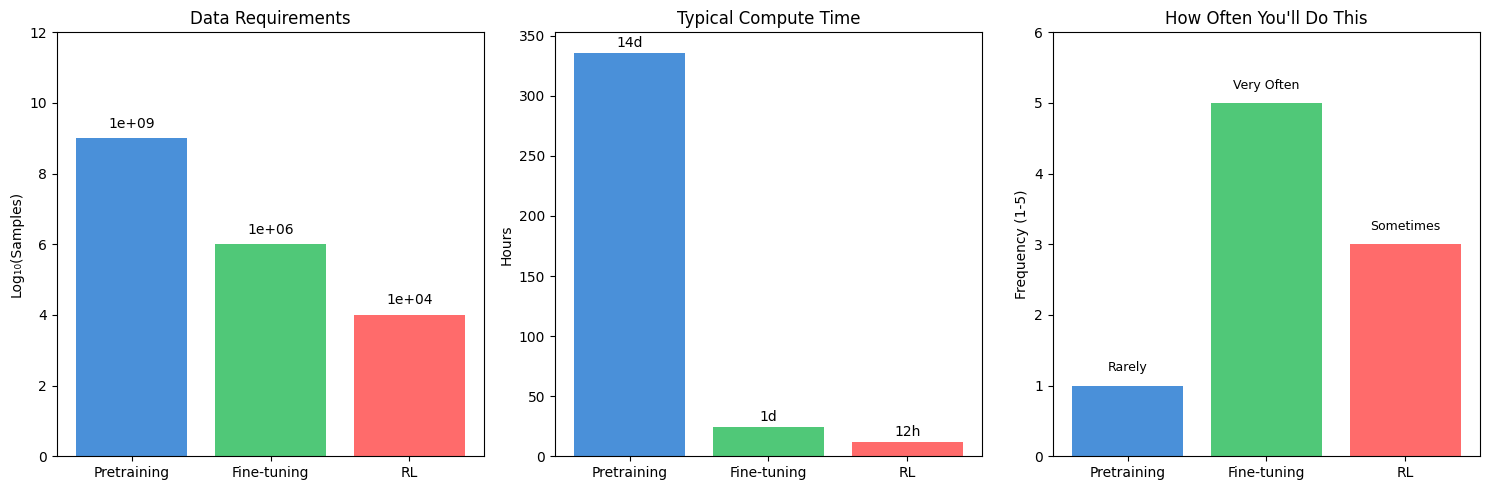

✅ Saved summary visualization to training_stages_summary.png


In [15]:
# Create a summary visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

stages = ["Pretraining", "Fine-tuning", "RL"]
colors = ["#4a90d9", "#50c878", "#ff6b6b"]

# Data scale
ax1 = axes[0]
data_scale = [1e9, 1e6, 1e4]  # Approximate sample counts
ax1.bar(stages, [np.log10(d) for d in data_scale], color=colors)
ax1.set_ylabel("Log₁₀(Samples)")
ax1.set_title("Data Requirements")
ax1.set_ylim(0, 12)
for i, v in enumerate(data_scale):
    ax1.text(i, np.log10(v) + 0.3, f"{v:.0e}", ha='center')

# Compute time
ax2 = axes[1]
compute_time = [14*24, 24, 12]  # Hours (2 weeks, 1 day, 12 hours)
ax2.bar(stages, compute_time, color=colors)
ax2.set_ylabel("Hours")
ax2.set_title("Typical Compute Time")
for i, v in enumerate(compute_time):
    label = f"{v//24}d" if v >= 24 else f"{v}h"
    ax2.text(i, v + 5, label, ha='center')

# Practitioner involvement
ax3 = axes[2]
involvement = [1, 5, 3]  # 1-5 scale
ax3.bar(stages, involvement, color=colors)
ax3.set_ylabel("Frequency (1-5)")
ax3.set_title("How Often You'll Do This")
ax3.set_ylim(0, 6)
labels = ["Rarely", "Very Often", "Sometimes"]
for i, (v, l) in enumerate(zip(involvement, labels)):
    ax3.text(i, v + 0.2, l, ha='center', fontsize=9)

plt.tight_layout()
plt.savefig("training_stages_summary.png", dpi=150, bbox_inches='tight')
plt.show()

print("✅ Saved summary visualization to training_stages_summary.png")

## 9. Key Takeaways

### For Data Scientists in Physical AI:

1. **Pretraining** happens before you get involved
   - Understand the concepts to choose models wisely
   - Focus on using pretrained models effectively

2. **Fine-tuning** is your primary focus
   - LoRA/QLoRA for VLMs (efficient, effective)
   - Behavior Cloning / Diffusion for VAMs
   - Action-conditioning for World Models

3. **RL** is for optimization beyond imitation
   - Offline RL when you can't interact with environment
   - Model-based RL for sample efficiency
   - Residual RL for safe improvements

4. **Know what to freeze**
   - Vision encoders: usually frozen
   - Pretrained LLM weights: frozen + LoRA adapters
   - Policy heads: always trained

### Next Steps

Continue to the next tutorial to see how to load and inspect pretrained models:
→ `01b_pretrained_models.py`

In [16]:
print("""
╔═══════════════════════════════════════════════════════════════╗
║                   TUTORIAL COMPLETE! 🎉                        ║
╠═══════════════════════════════════════════════════════════════╣
║                                                                ║
║  You now understand:                                           ║
║  ✓ The three training stages: Pretraining, Fine-tuning, RL    ║
║  ✓ Which stages apply to which model types                    ║
║  ✓ Parameter-efficient fine-tuning (LoRA)                     ║
║  ✓ When to use different RL approaches                        ║
║                                                                ║
║  Next: 01b_pretrained_models.py                               ║
║        Learn to load and inspect pretrained models            ║
║                                                                ║
╚═══════════════════════════════════════════════════════════════╝
""")


╔═══════════════════════════════════════════════════════════════╗
║                   TUTORIAL COMPLETE! 🎉                        ║
╠═══════════════════════════════════════════════════════════════╣
║                                                                ║
║  You now understand:                                           ║
║  ✓ The three training stages: Pretraining, Fine-tuning, RL    ║
║  ✓ Which stages apply to which model types                    ║
║  ✓ Parameter-efficient fine-tuning (LoRA)                     ║
║  ✓ When to use different RL approaches                        ║
║                                                                ║
║  Next: 01b_pretrained_models.py                               ║
║        Learn to load and inspect pretrained models            ║
║                                                                ║
╚═══════════════════════════════════════════════════════════════╝

